## Swiggy Data Insights

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
all_data = pd.read_csv("swiggy.csv")#reading data
all_data.head()

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar


### Cleaning The Data

In [3]:
# Dropping NaN values from dataframe

#getting all NaN rows
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

#dropping NaN values from dataframe
all_data  = all_data.dropna(how = 'all')
all_data.head()

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Restaurant Name    140657 non-null  object
 1   Cuisine            140630 non-null  object
 2   Rating             140657 non-null  object
 3   Number of Ratings  126115 non-null  object
 4   Average Price      140657 non-null  object
 5   Number of Offers   140657 non-null  int64 
 6   Offer Name         138849 non-null  object
 7   Area               140655 non-null  object
 8   Pure Veg           140657 non-null  object
 9   Location           140657 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.7+ MB


> #### Restaurant with Maximum Rating at Particular Place

In [5]:
all_data.rename(columns={'Restaurant Name' :'Name'}, inplace=True)

In [6]:
all_data['Rating'].value_counts().head(5)

--     19177
NEW    14542
4.3    13351
4.2    12717
4.1    10719
Name: Rating, dtype: int64

In [7]:
def fun(column):
    rating_int = []
    for i in column:
        if i == 'NEW':
            rating_int.append(0)
        elif i == '--':
            rating_int.append(0)
        else:
            rating_int.append(float(i))
    return rating_int


all_data['Rating'] = fun(all_data['Rating'])
all_data['Rating'].replace(0.0, all_data['Rating'].mean()) 

0         4.000000
1         3.600000
2         3.800000
3         3.500000
4         4.300000
            ...   
140652    4.600000
140653    3.200000
140654    3.200000
140655    4.300000
140656    3.069968
Name: Rating, Length: 140657, dtype: float64

In [8]:
all_data = all_data[all_data['Location'] == 'Abohar']
all_data.groupby('Name')['Rating'].max().sort_values(ascending=False).head(1).reset_index()

,Name,Rating
0,Cafe M,5.0


In [9]:
all_data

,Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar
5,Grill Masters,"Italian-American, Fast Food",4.1,100+ ratings,₹250 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Circular Road,No,Abohar
6,The Chocolate Room,Indian,3.9,20+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,Yes,Abohar
7,Snakkers,"Burgers, Pastas",4.2,100+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,NEAR DAV COLEEGE,No,Abohar
8,Dumpling Hood,Fast Food,0.0,NaN,₹199 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,No,Abohar
9,Picado International Food,"Pizzas, Beverages",4.3,100+ ratings,₹300 for two,2,"40% OFF UPTO ₹80\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,Yes,Abohar


**Replacing Average Price by just Integer Values**

In [10]:
all_data['Average Price'] = all_data['Average Price'].str.extract('(\d+)').fillna(0).astype(int)

In [11]:
all_data

,Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,250,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,250,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,200,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,49,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,200,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar
5,Grill Masters,"Italian-American, Fast Food",4.1,100+ ratings,250,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Circular Road,No,Abohar
6,The Chocolate Room,Indian,3.9,20+ ratings,250,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,Yes,Abohar
7,Snakkers,"Burgers, Pastas",4.2,100+ ratings,200,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,NEAR DAV COLEEGE,No,Abohar
8,Dumpling Hood,Fast Food,0.0,NaN,199,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,No,Abohar
9,Picado International Food,"Pizzas, Beverages",4.3,100+ ratings,300,2,"40% OFF UPTO ₹80\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,Yes,Abohar


**Cleaning Number Of Ratings Value**

In [12]:
all_data['Rating'] = all_data['Rating'].replace('-', '0')

In [13]:
all_data['Number of Ratings'] = all_data['Number of Ratings'].replace('Too Few Ratings', '0')

In [14]:
all_data

,Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,250,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,250,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,200,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,49,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,200,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar
5,Grill Masters,"Italian-American, Fast Food",4.1,100+ ratings,250,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Circular Road,No,Abohar
6,The Chocolate Room,Indian,3.9,20+ ratings,250,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,Yes,Abohar
7,Snakkers,"Burgers, Pastas",4.2,100+ ratings,200,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,NEAR DAV COLEEGE,No,Abohar
8,Dumpling Hood,Fast Food,0.0,NaN,199,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,No,Abohar
9,Picado International Food,"Pizzas, Beverages",4.3,100+ ratings,300,2,"40% OFF UPTO ₹80\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,Yes,Abohar


In [15]:
all_data['Number of Ratings'] = all_data['Number of Ratings'].str.replace(r'\+.*', '', regex=True)

In [16]:
all_data

,Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10,250,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50,250,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10,200,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,49,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100,200,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar
5,Grill Masters,"Italian-American, Fast Food",4.1,100,250,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Circular Road,No,Abohar
6,The Chocolate Room,Indian,3.9,20,250,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,Yes,Abohar
7,Snakkers,"Burgers, Pastas",4.2,100,200,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,NEAR DAV COLEEGE,No,Abohar
8,Dumpling Hood,Fast Food,0.0,NaN,199,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,No,Abohar
9,Picado International Food,"Pizzas, Beverages",4.3,100,300,2,"40% OFF UPTO ₹80\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,Yes,Abohar


**Cleaning Null Values**

In [17]:
all_data['Number of Ratings'] = all_data['Number of Ratings'].str.replace(r'\D', '', regex=True)
all_data['Number of Ratings'] = all_data['Number of Ratings'].replace(np.nan, 0)
all_data['Offer Name'] = all_data['Offer Name'].str.replace('\n', ',')

In [18]:
all_data

,Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10,250,2,"FLAT DEAL,FLAT ₹125 OFF,USE FLAT125ABOVE ₹699,...",LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50,250,2,"30% OFF UPTO ₹75,USE TRYNEWABOVE ₹149, FLAT ₹1...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10,200,1,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500",Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8,49,5,"50% OFF UPTO ₹100,USE TRYNEWABOVE ₹129, FLAT D...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100,200,2,"DEAL OF DAY,10% OFF UPTO ₹40,USE STEALDEALABOV...",Circular Road,No,Abohar
5,Grill Masters,"Italian-American, Fast Food",4.1,100,250,1,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500",Circular Road,No,Abohar
6,The Chocolate Room,Indian,3.9,20,250,2,"30% OFF UPTO ₹75,USE TRYNEWABOVE ₹149, FLAT ₹1...",Central Abohar,Yes,Abohar
7,Snakkers,"Burgers, Pastas",4.2,100,200,1,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500",NEAR DAV COLEEGE,No,Abohar
8,Dumpling Hood,Fast Food,0.0,0,199,1,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500",Central Abohar,No,Abohar
9,Picado International Food,"Pizzas, Beverages",4.3,100,300,2,"40% OFF UPTO ₹80,USE TRYNEWABOVE ₹149, FLAT ₹1...",Central Abohar,Yes,Abohar


> #### Insights Of Pure Veg And Nonveg Restaurants

In [19]:
pure_veg_counts = all_data['Pure Veg'].value_counts().reset_index()
pure_veg_counts.columns = ['Pure Veg', 'Count']

# Plotting a pie chart
fig = px.pie(
    pure_veg_counts,
    names='Pure Veg',
    values='Count',
    title='Distribution of Pure Vegetarian Restaurants',
    color_discrete_sequence=px.colors.qualitative.Set3,
    template='seaborn'
)
fig.show()

> ### Rating Distribution

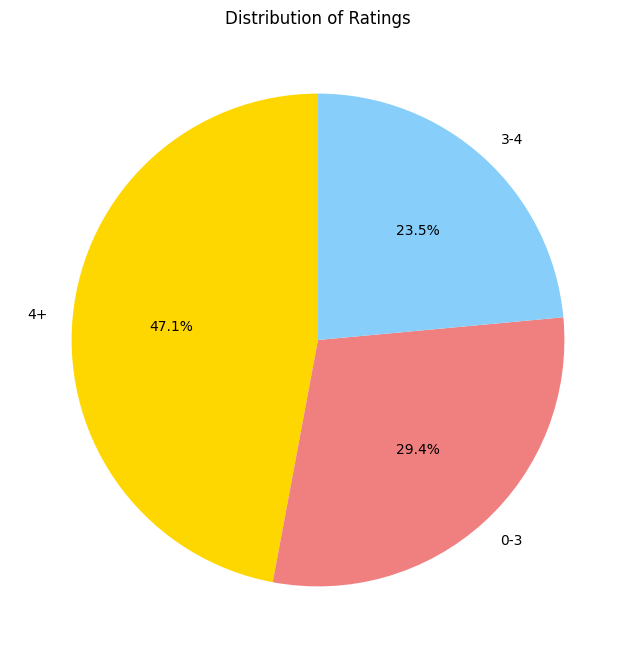

In [20]:
all_data['Rating'] = pd.to_numeric(all_data['Rating'], errors='coerce')
all_data['Rating Category'] = all_data['Rating'].apply(
    lambda x: '0-3' if pd.isna(x) or x < 3 else ('3-4' if x < 4 else '4+'))
rating_counts = all_data['Rating Category'].value_counts()
colors = ['gold', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index,
        autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Ratings')
plt.show()

> ### Cuisine List

In [21]:
cuisine_column = all_data['Cuisine']

all_cuisines = [cuisine.split(', ')
                for cuisine in cuisine_column if pd.notna(cuisine)]
unique_cuisines = set([c for sublist in all_cuisines for c in sublist])

print("All Possible Cuisines:", unique_cuisines)

cuisine_counts = all_data['Cuisine'].str.split(', ').explode().value_counts()
top_20_cuisines = cuisine_counts.head(20)
plot_data = pd.DataFrame(
    {'Cuisine': top_20_cuisines.index, 'Frequency': top_20_cuisines.values})
colors = px.colors.qualitative.Set3

fig = px.bar(plot_data, x='Frequency', y='Cuisine', color='Cuisine',
             color_discrete_sequence=colors,
             orientation='h', labels={'Frequency': 'Frequency'},
             title='Top Cuisines', width=800, height=500)

fig.update_layout(showlegend=False)
fig.show()

All Possible Cuisines: {'Italian', 'Juices', 'Mughlai', 'Pizzas', 'American', 'Continental', 'Snacks', 'Burgers', 'Beverages', 'Indian', 'North Indian', 'Chinese', 'Thalis', 'Chaat', 'Bakery', 'Desserts', 'Italian-American', 'Sweets', 'Fast Food', 'Pastas', 'Cafe'}


> ### Average Price Distribution

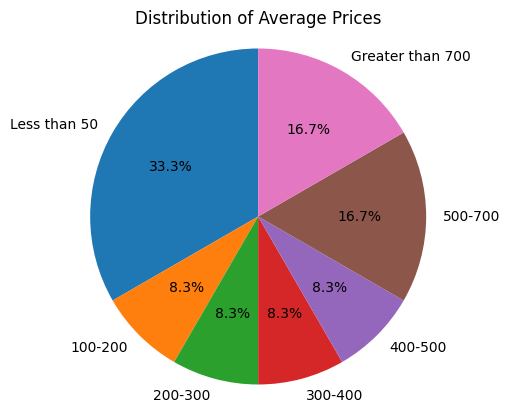

In [23]:
# Dividing unique price range
unique_prices = [50, 100, 150, 200, 250, 300, 500, 400, 350, 450,
                 40, 0, 550, 48, 1, 600, 32, 900, 750, 800, 650, 10, 12, 850, 2]

price_ranges = {
    'Less than 50': lambda x: x < 50,
    '100-200': lambda x: 100 <= x < 200,
    '200-300': lambda x: 200 <= x < 300,
    '300-400': lambda x: 300 <= x < 400,
    '400-500': lambda x: 400 <= x < 500,
    '500-700': lambda x: 500 <= x < 700,
    'Greater than 700': lambda x: x > 700
} # price range of food added


# Counting the occurrences of price
price_counts = {range_name: sum(price_range(price) for price in unique_prices)
                for range_name, price_range in price_ranges.items()}

labels = price_counts.keys()
sizes = price_counts.values()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Distribution of Average Prices')
plt.show()